In [1]:
import pandas as pd

## CLOSS output analysis and evaluation

In [30]:
df = pd.read_csv("../output/closs-output.csv")
df.head()

,original_text,original_score,original_perplexity,counterfactual_text,counterfactual_score,counterfactual_perplexity,found_flip,frac_tokens_same
0,This movie was sadly under-promoted but proved...,0.999810,34.899414,This movie was eventually under-promoted but a...,0.457455,93.200562,True,0.921739
1,"On a dark, gloomy new year's eve night, an ill...",0.998378,42.523102,"On a dark, gloomy new year's eve night, an ill...",0.002253,43.910484,True,0.998047
2,Haines is excellent as the brash cadet who thi...,0.999730,135.480118,Haines is failed as the brash cadet who thinks...,0.451663,147.042648,True,0.984925
3,This movie states through its protagonist that...,0.000304,37.368423,This movie states through its protagonist that...,0.989142,40.474190,True,0.990291
4,Just saw this movie on opening night. I read s...,0.000141,30.122791,Just saw this movie on opening night. I read s...,0.950138,30.520218,True,0.988950


In [11]:
# remove the first column:
df = df.drop(df.columns[0], axis=1)
df.head()

,original_text,original_score,original_perplexity,counterfactual_text,counterfactual_score,counterfactual_perplexity,found_flip,frac_tokens_same
0,This movie was sadly under-promoted but proved...,0.999810,34.899414,This movie was recently under-promoted but pro...,0.224318,84.701691,True,0.930435
1,"On a dark, gloomy new year's eve night, an ill...",0.998378,42.523079,"On a dark, gloomy new year's eve night, an ill...",0.010024,44.452606,True,0.998047
2,Haines is excellent as the brash cadet who thi...,0.999730,135.480377,Haines is excellent as the brash cadet who thi...,0.459861,145.363571,True,0.984925
3,This movie states through its protagonist that...,0.000304,37.368465,This movie states through its protagonist that...,0.591664,45.895756,True,0.990291
4,Just saw this movie on opening night. I read s...,0.000141,30.122791,Just saw this movie on opening night. I read s...,0.809161,33.185787,True,0.988950


The metrics we want to calculate are:

- **Label flip score:** the percentage of the time the counterfactual flips the output of the classifier.
    - You can calculate this easily using the found flip column.
-  **Fraction of tokens changed:** the average fraction of tokens that are changed in the input when generating the counterfactual.
    - Calculate this using the frac_tokens_same column.
- **Perplexity:** the perplexity score of the generated counterfactual (lower is better)
    - Calculate the average perplexity for the original and counterfactual text.

Label flip score:

In [28]:
label_flip_score = df["found_flip"].mean()
print(f"Label flip score: {label_flip_score:.3f}")

Label flip score: 0.900


Mean fraction of tokens unchanged:

In [34]:
mean_fraction_tokens_same = df["frac_tokens_same"].mean()
print(f"mean fraction of tokens the same: {mean_fraction_tokens_same:.3f}")

mean fraction of tokens the same: 0.980


Calculate the mean perplexity. You can use the mean original perplexity as an ideal to compare the counterfactual perplexity to.

In [36]:
def min_max_scaler(x):
    return (x - x.min()) / (x.max() - x.min())

mean_original_perplexity = df["original_perplexity"].mean()
inverted_original_perplexity = 1 / mean_original_perplexity

mean_counterfactual_perplexity = df["counterfactual_perplexity"].mean()
inverted_counterfactual_perplexity = 1 / mean_counterfactual_perplexity

print(f"mean original perplexity: {mean_original_perplexity:.3f}")
print(f"mean counterfactual perplexity: {mean_perplexity:.3f}", end="\n\n")

print(f"inverted original perplexity: {inverted_original_perplexity:.3f}")
print(f"inverted counterfactual perplexity: {inverted_counterfactual_perplexity:.3f}")

mean original perplexity: 53.870
mean counterfactual perplexity: 65.052

inverted original perplexity: 0.019
inverted counterfactual perplexity: 0.015


Note: you could use minmax scaling to scale the perplexity score range from 0 to 1.

Create a grouped bar chart showing the three metrics for CLOSS. I would like a grouped bar chart showing the three metrics for each model:
- Label flip rate: how often the counterfactual flips the label
- Fraction of tokens the same: how similar the counterfactual is to the original text
- Inverted perplexity: how natural and realistic the counterfactual is

In [42]:
data = {
    "method_name": ["CLOSS"],
    "label_flip_score": [label_flip_score],
    "mean_fraction_tokens_same": [mean_fraction_tokens_same],
    "mean_inverted_counterfactual_perplexity": [inverted_counterfactual_perplexity],
}
# df = pd.DataFrame(data, index=["method_name"])
df = pd.DataFrame(data)
df = df.set_index("method_name")
df.head()

,label_flip_score,mean_fraction_tokens_same,mean_inverted_counterfactual_perplexity
method_name,,,
CLOSS,0.9,0.980383,0.015372


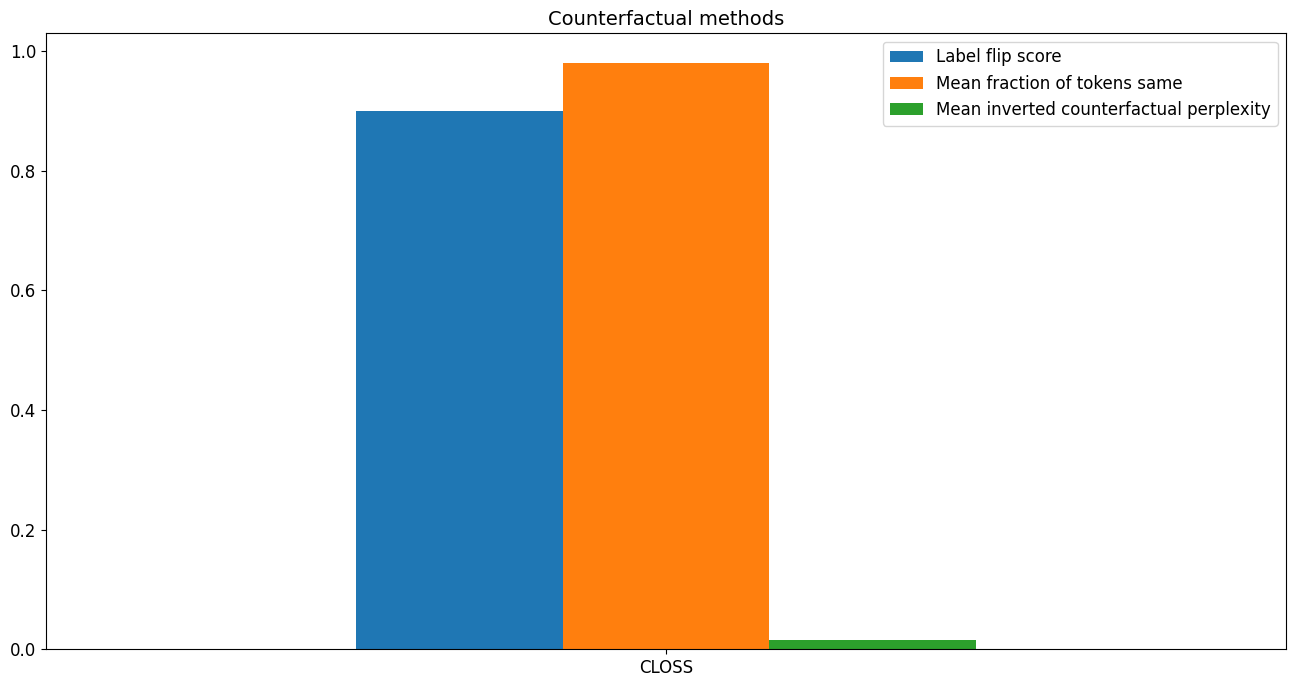

In [49]:
ax = df.plot.bar(figsize=(16, 8), fontsize=12)
ax.set_xlabel("", fontsize=12)
ax.set_xticklabels(df.index, rotation=0)
ax.set_title("Counterfactual methods", fontsize=14)
ax.legend(["Label flip score", "Mean fraction of tokens same", "Mean inverted counterfactual perplexity"], fontsize=12)

# ax = df.plot.bar(figsize=(15, 4), fontsize=14)
# # customize the axes and title
# ax.set_ylim((0,25))
# ax.set_xlabel("Student", fontsize=14)
# ax.set_ylabel("Mark %", fontsize=14)
# ax.set_title("Module Results", fontsize=14)
# # move the legend to outside the plot
# ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14);